# **Advanced Machine Learning Methods**
## **Maestría en Inteligencia Artificial Aplicada**
### **Dr. José Antonio Cantoral Ceballos**
### **Tecnológico de Monterrey**
## **Activity 2b: Building a CNN for CIFAR10 Dataset with PyTorch**
---

### Team 7

- Rodrigo Robledo Castillo - A01797582
- Pedro David Juarez Leyva - A01797041
- Emilio Contreras Téllez - A01111353
- Omar Aguilar Macedo - A0179707

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

#only if you have jupyterthemes
# from jupyterthemes import jtplot
# jtplot.style()

### Download Cifar10 dataset

In [2]:
torch.cuda.is_available()

False

In [3]:
DATA_PATH = './cifar-10'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

In [4]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./cifar-10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [5]:
train_loader.dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./cifar-10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [6]:
for i, (x, y) in enumerate(test_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 32, 32]) torch.Size([64])
1 torch.Size([64, 3, 32, 32]) torch.Size([64])
2 torch.Size([64, 3, 32, 32]) torch.Size([64])
3 torch.Size([64, 3, 32, 32]) torch.Size([64])
4 torch.Size([64, 3, 32, 32]) torch.Size([64])
5 torch.Size([64, 3, 32, 32]) torch.Size([64])
6 torch.Size([64, 3, 32, 32]) torch.Size([64])
7 torch.Size([64, 3, 32, 32]) torch.Size([64])
8 torch.Size([64, 3, 32, 32]) torch.Size([64])
9 torch.Size([64, 3, 32, 32]) torch.Size([64])
10 torch.Size([64, 3, 32, 32]) torch.Size([64])
11 torch.Size([64, 3, 32, 32]) torch.Size([64])
12 torch.Size([64, 3, 32, 32]) torch.Size([64])
13 torch.Size([64, 3, 32, 32]) torch.Size([64])
14 torch.Size([64, 3, 32, 32]) torch.Size([64])
15 torch.Size([64, 3, 32, 32]) torch.Size([64])
16 torch.Size([64, 3, 32, 32]) torch.Size([64])
17 torch.Size([64, 3, 32, 32]) torch.Size([64])
18 torch.Size([64, 3, 32, 32]) torch.Size([64])
19 torch.Size([64, 3, 32, 32]) torch.Size([64])
20 torch.Size([64, 3, 32, 32]) torch.Size([64])
21

### Using  GPUs

In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: dog


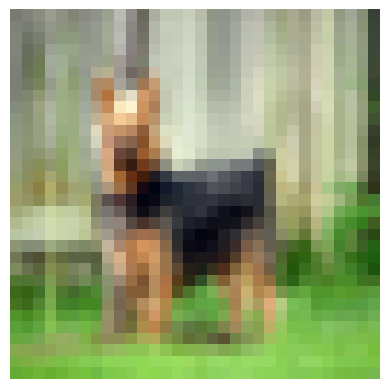

In [8]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


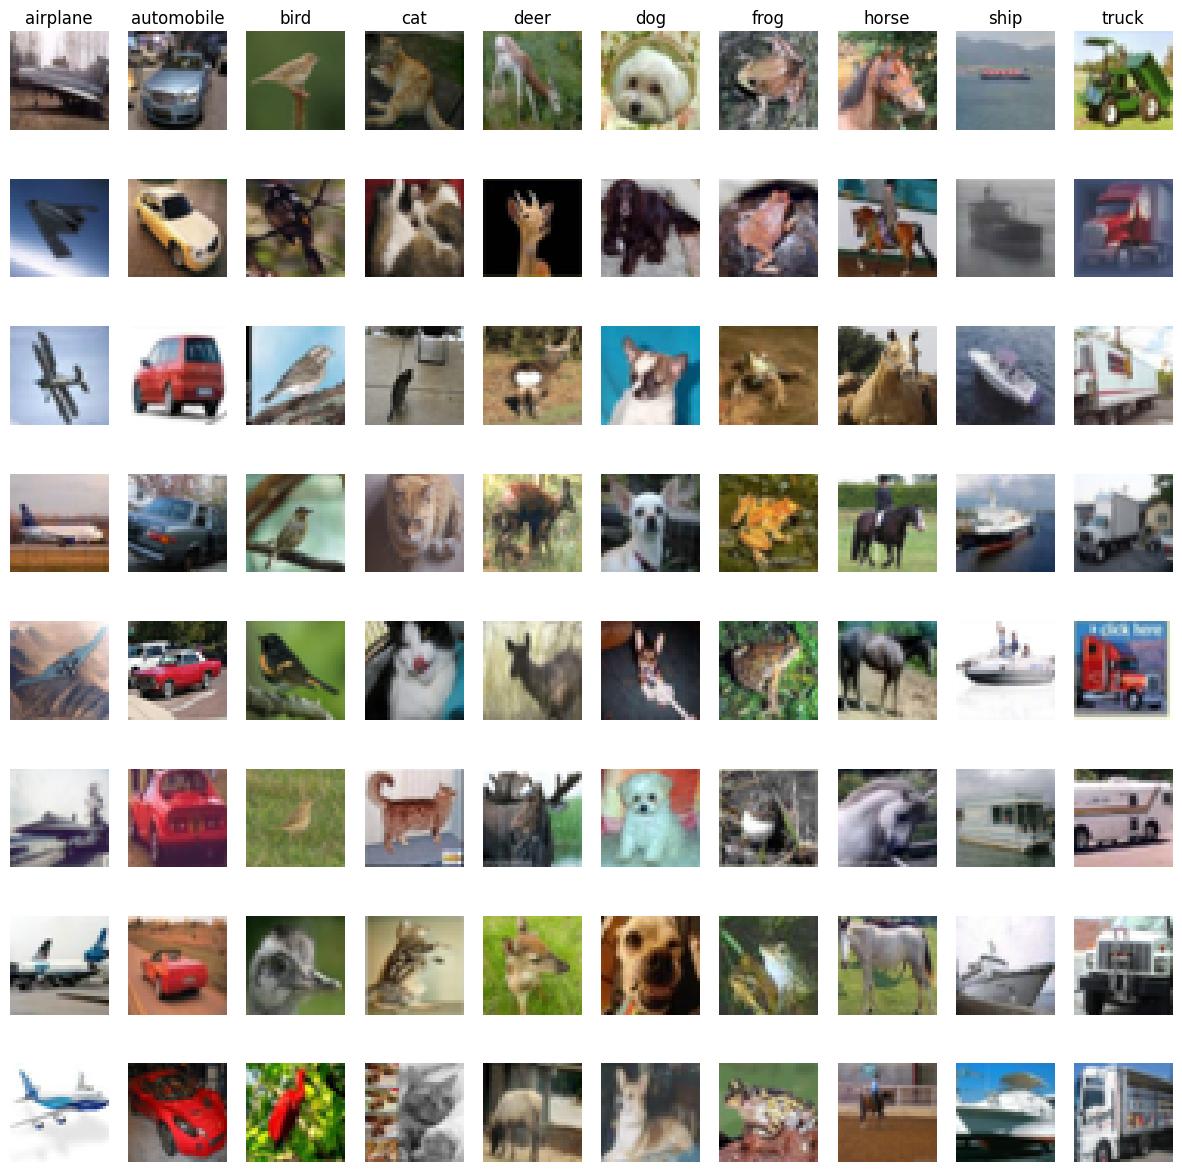

In [9]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [10]:
def accuracy(model, loader):
  num_correct = 0
  num_total = 0
  model.eval()
  model = model.to(device=device)
  with torch.no_grad():
      for xi, yi in loader:
          xi = xi.to(device=device, dtype=torch.float32)
          yi = yi.to(device=device, dtype=torch.long)
          scores = model(xi)
          pred = scores.argmax(dim=1)
          num_correct += (pred == yi).sum().item()
          num_total += yi.size(0)
  return num_correct / num_total

### Loop de entrenamiento

In [11]:
def train(model, optimizer, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
      model.train()
      for i, (xi, yi) in enumerate(train_loader):
        xi = xi.to(device=device, dtype=torch.float32)
        yi = yi.to(device=device, dtype=torch.long)
        scores = model(xi)
        loss = F.cross_entropy(scores, yi)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      acc = accuracy(model, val_loader)
      print(f'Epoch: {epoch + 1}, costo: {loss.item()}, accuracy: {acc}')

### Linear model

In [12]:
# To do: Use PyTorch to create a linear model to have an initial baseline model
input_features = 3 * 32 * 32
hidden_01 = 256
hidden_02 = 256
output_features = 10

lr = 1e-3;
epochs = 10

model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_features, hidden_01), nn.ReLU(),
    nn.Linear(hidden_01, hidden_02), nn.ReLU(),
    nn.Linear(hidden_02, output_features)
)
optimizer = torch.optim.Adam(model1.parameters(), lr=lr)

In [13]:
train(model1, optimizer, epochs)

Epoch: 1, costo: 1.438814401626587, accuracy: 0.4626
Epoch: 2, costo: 1.6491961479187012, accuracy: 0.5126
Epoch: 3, costo: 1.242936372756958, accuracy: 0.5032
Epoch: 4, costo: 1.1788995265960693, accuracy: 0.5234
Epoch: 5, costo: 0.90012127161026, accuracy: 0.529
Epoch: 6, costo: 1.076055645942688, accuracy: 0.5318
Epoch: 7, costo: 0.6977214217185974, accuracy: 0.5356
Epoch: 8, costo: 0.9675225615501404, accuracy: 0.5358
Epoch: 9, costo: 1.3640764951705933, accuracy: 0.5328
Epoch: 10, costo: 0.5466822385787964, accuracy: 0.5156


In [14]:
accuracy(model1, test_loader)

0.5178

### Sequential CNN

In [15]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than
#the linear model

initial_channels = 3
channel_01 = 16
channel_02 = 32
channel_03 = 64
out_features = 10

epochs = 10
lr = 1e-4

bias = True
modelCNN1 = nn.Sequential(
    nn.Conv2d(initial_channels, channel_01, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(channel_01),
    nn.ReLU(inplace = True),

    nn.Conv2d(channel_01, channel_02, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(channel_02),
    nn.ReLU(inplace = True),
    nn.MaxPool2d(kernel_size=2, stride=2), # 32 > 16

    nn.Conv2d(channel_02, channel_03, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(channel_03),
    nn.ReLU(inplace = True),
    nn.MaxPool2d(kernel_size=2, stride=2), # 16 > 8

    nn.Flatten(),
    nn.Linear(channel_03 * 8 * 8, out_features)
)

optimizer = torch.optim.Adam(modelCNN1.parameters(), lr=lr)

In [16]:
train(modelCNN1, optimizer, epochs)

Epoch: 1, costo: 1.220641851425171, accuracy: 0.5982
Epoch: 2, costo: 1.0236212015151978, accuracy: 0.6344
Epoch: 3, costo: 0.5149567723274231, accuracy: 0.6686
Epoch: 4, costo: 0.48629915714263916, accuracy: 0.6774
Epoch: 5, costo: 0.6391265988349915, accuracy: 0.6954
Epoch: 6, costo: 0.8150388598442078, accuracy: 0.7028
Epoch: 7, costo: 0.8589759469032288, accuracy: 0.7088
Epoch: 8, costo: 0.5320916175842285, accuracy: 0.713
Epoch: 9, costo: 0.45965370535850525, accuracy: 0.7148
Epoch: 10, costo: 0.868793249130249, accuracy: 0.719


In [17]:
accuracy(modelCNN1, test_loader)

0.7174

In [18]:
initial_channels = 3
channel_01 = 16
channel_02 = 32
channel_03 = 64
out_features = 10

epochs = 10
lr = 1e-3

bias = True
modelCNN2 = nn.Sequential(
    nn.Conv2d(initial_channels, channel_01, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(channel_01),
    nn.ReLU(inplace = True),

    nn.Conv2d(channel_01, channel_02, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(channel_02),
    nn.ReLU(inplace = True),
    nn.MaxPool2d(kernel_size=2, stride=2), # 32 > 16

    nn.Conv2d(channel_02, channel_03, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(channel_03),
    nn.ReLU(inplace = True),
    nn.MaxPool2d(kernel_size=2, stride=2), # 16 > 8

    nn.Flatten(),
    nn.Linear(channel_03 * 8 * 8, out_features)
)

optimizer2 = torch.optim.Adam(modelCNN2.parameters(), lr=lr)


In [19]:
train(modelCNN2, optimizer2, epochs)

Epoch: 1, costo: 1.3396058082580566, accuracy: 0.658
Epoch: 2, costo: 0.7101910710334778, accuracy: 0.684
Epoch: 3, costo: 0.4940961003303528, accuracy: 0.711
Epoch: 4, costo: 1.0731204748153687, accuracy: 0.7436
Epoch: 5, costo: 0.7470765709877014, accuracy: 0.7408
Epoch: 6, costo: 0.6079195141792297, accuracy: 0.7408
Epoch: 7, costo: 0.6991939544677734, accuracy: 0.7214
Epoch: 8, costo: 0.8104395270347595, accuracy: 0.7508
Epoch: 9, costo: 0.2556989789009094, accuracy: 0.7496
Epoch: 10, costo: 0.7682945132255554, accuracy: 0.7504


In [20]:
accuracy(modelCNN2, test_loader)

0.7408

In [21]:
initial_channels = 3
channel_01 = 16
channel_02 = 32
channel_03 = 64
out_features = 10

epochs = 10
lr = 1e-3
weight_decay = 1e-4

modelCNN3 = nn.Sequential(
    nn.Conv2d(initial_channels, channel_01, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(channel_01),
    nn.ReLU(inplace = True),

    nn.Conv2d(channel_01, channel_02, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(channel_02),
    nn.ReLU(inplace = True),
    nn.MaxPool2d(kernel_size=2, stride=2), # 32 > 16

    nn.Conv2d(channel_02, channel_03, kernel_size=3, padding=1, bias = False),
    nn.BatchNorm2d(channel_03),
    nn.ReLU(inplace = True),
    nn.MaxPool2d(kernel_size=2, stride=2), # 16 > 8

    nn.Flatten(),
    nn.Linear(channel_03 * 8 * 8, out_features)
)

optimizer3 = torch.optim.Adam(modelCNN3.parameters(), lr=lr, weight_decay=weight_decay)


In [22]:
train(modelCNN3, optimizer3, epochs)

Epoch: 1, costo: 1.1854302883148193, accuracy: 0.6174
Epoch: 2, costo: 0.9737182855606079, accuracy: 0.6758
Epoch: 3, costo: 0.9359314441680908, accuracy: 0.7104
Epoch: 4, costo: 0.7714433670043945, accuracy: 0.6972
Epoch: 5, costo: 0.5586520433425903, accuracy: 0.7274
Epoch: 6, costo: 0.3049303889274597, accuracy: 0.7472
Epoch: 7, costo: 0.24904921650886536, accuracy: 0.75
Epoch: 8, costo: 0.47002413868904114, accuracy: 0.7552
Epoch: 9, costo: 0.27580171823501587, accuracy: 0.7534
Epoch: 10, costo: 0.27719247341156006, accuracy: 0.75


In [23]:
accuracy(modelCNN3, test_loader)

0.7552